In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
d = pd.read_csv("data5.csv")
d.head()

,N,y,x,id
0,8,0,2,1
1,8,1,2,2
2,8,2,2,3
3,8,4,2,4
4,8,1,2,5


In [3]:
d.describe()

,N,y,x,id
count,100.0,100.000000,100.000000,100.000000
mean,8.0,3.810000,4.000000,50.500000
std,0.0,3.070534,1.421338,29.011492
min,8.0,0.000000,2.000000,1.000000
25%,8.0,1.000000,3.000000,25.750000
50%,8.0,3.000000,4.000000,50.500000
75%,8.0,7.000000,5.000000,75.250000
max,8.0,8.000000,6.000000,100.000000


Text(0, 0.5, 'survive')

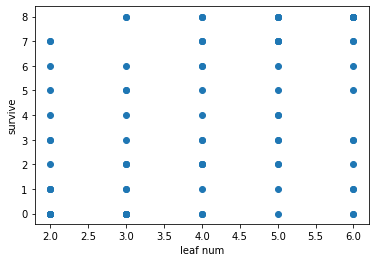

In [4]:
plt.scatter(d.x, d.y)
plt.xlabel("leaf num")
plt.ylabel("survive")


In [5]:
model = smf.glm("y + I(N-y) ~ x", data=d, family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -322.80
Date:                Sun, 11 Aug 2019   Deviance:                       513.84
Time:                        00:01:50   Pearson chi2:                     428.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1487      0.237     -9.057      0.000      -2.614      -1.684
x              0.5104      0.056      9.179      0.000       0.401       0.619
==============================================================================
"""

[]

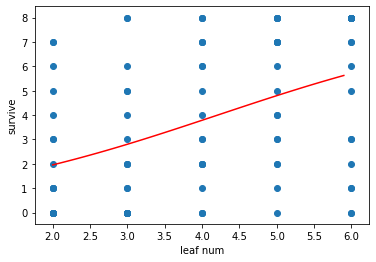

In [6]:
df_test = pd.DataFrame()
df_test["x"] = np.arange(2, 6, 0.1)
plt.plot(df_test.x, result.predict(df_test["x"])*8, c="red")
plt.scatter(d.x, d.y)
plt.xlabel("leaf num")
plt.ylabel("survive")
plt.plot()

In [7]:
d[d.x==4].groupby([d.y]).count()["N"]

y
0    3
1    1
2    4
3    2
4    1
5    1
6    2
7    3
8    3
Name: N, dtype: int64

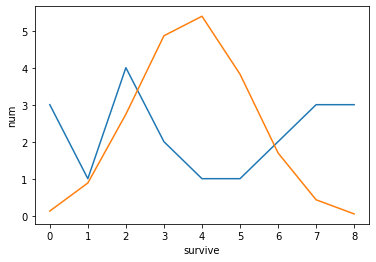

In [10]:
from scipy.stats import binom
k = np.arange(0, 9, 1)
plt.plot(d[d.x==4].groupby([d.y]).count()["N"].values)
plt.xlabel("survive")
plt.ylabel("num")
plt.plot(k, binom.pmf(k, 8, 0.47)*20)

In [53]:
d_4 = pd.DataFrame()
d_4 = d[d.x==4]
d_4.y.describe()

count    20.000000
mean      4.050000
std       2.892367
min       0.000000
25%       2.000000
50%       3.500000
75%       7.000000
max       8.000000
Name: y, dtype: float64

In [9]:
import pyper
r = pyper.R()
r("glmmML(cbind(y, N-y) ~ x, data=d, family=binomial, cluster=id)")

'try({glmmML(cbind(y, N-y) ~ x, data=d, family=binomial, cluster=id)})\nError in glmmML(cbind(y, N - y) ~ x, data = d, family = binomial, cluster = id) : \n   関数 "glmmML" を見つけることができませんでした \n'